<a href="https://colab.research.google.com/github/vaishnavaa1997/GL-Projects/blob/main/ML2_Extended_Project_Template_Notebook_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem Statement

### Business context

Employee Promotion means the ascension of an employee to higher ranks, this aspect of the job is what drives employees the most. The ultimate reward for dedication and loyalty towards an organization and the HR team plays an important role in handling all these promotion tasks based on ratings and other attributes available.

The HR team in JMD company stored data on the promotion cycle last year, which consists of details of all the employees in the company working last year and also if they got promoted or not, but every time this process gets delayed due to so many details available for each employee - it gets difficult to compare and decide.


### Objective

For the upcoming appraisal cycle, the HR team wants to utilize the stored data and leverage machine learning to make a model that will predict if a person is eligible for promotion or not. You, as a data scientist at JMD company, need to come up with the best possible model that will help the HR team to predict if a person is eligible for promotion or not.


### Data Description

- employee_id: Unique ID for the employee
- department: Department of employee
- region: Region of employment (unordered)
- education: Education Level
- gender: Gender of Employee
- recruitment_channel: Channel of recruitment for employee
- no_ of_ trainings: no of other training completed in the previous year on soft skills, technical skills, etc.
- age: Age of Employee
- previous_ year_ rating: Employee Rating for the previous year
- length_ of_ service: Length of service in years
- awards_ won: if awards won during the previous year then 1 else 0
- avg_ training_ score: Average score in current training evaluations
- is_promoted: (Target) Recommended for promotion

## **Please read the instructions carefully before starting the project.**
This is a commented Jupyter IPython Notebook file in which all the instructions and tasks to be performed are mentioned.
* Blanks '_______' are provided in the notebook that
needs to be filled with an appropriate code to get the correct result. With every '_______' blank, there is a comment that briefly describes what needs to be filled in the blank space.
* Identify the task to be performed correctly, and only then proceed to write the required code.
* Fill the code wherever asked by the commented lines like "# write your code here" or "# complete the code". Running incomplete code may throw error.
* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors.
* Add the results/observations (wherever mentioned) derived from the analysis in the presentation and submit the same.


## Importing necessary libraries

In [ ]:
# Installing the libraries with the specified version.
# uncomment and run the following line if Google Colab is being used
# !pip install scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 imbalanced-learn==0.10.1 xgboost==2.0.3 -q --user

In [ ]:
# Installing the libraries with the specified version.
# uncomment and run the following lines if Jupyter Notebook is being used
# !pip install scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 imbalanced-learn==0.10.1 xgboost==2.0.3 -q --user
# !pip install --upgrade -q threadpoolctl

In [1]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To tune model, get different metric scores, and split data
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay,
)
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To do hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# To impute missing values
from sklearn.impute import SimpleImputer

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To help with model building
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

# To suppress scientific notations
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To supress warnings
import warnings

warnings.filterwarnings("ignore")

## Loading the dataset

In [10]:
promotion = pd.read_csv("employee_promotion.csv")

## Data Overview

The initial steps to get an overview of any dataset is to:
- observe the first few rows of the dataset, to check whether the dataset has been loaded properly or not
- get information about the number of rows and columns in the dataset
- find out the data types of the columns to ensure that data is stored in the preferred format and the value of each property is as expected.
- check the statistical summary of the dataset to get an overview of the numerical columns of the data

### Checking the shape of the dataset

In [11]:
# Checking the number of rows and columns in the training data
promotion.shape ##  Complete the code to view dimensions of the train data

(54808, 13)

In [12]:
# let's create a copy of the data
data = promotion.copy()

### Displaying the first few rows of the dataset

In [13]:
# let's view the first 5 rows of the data
data.head ##  Complete the code to view top 5 rows of the data

<bound method NDFrame.head of        employee_id         department     region         education gender  \
0            65438  Sales & Marketing   region_7  Master's & above      f   
1            65141         Operations  region_22        Bachelor's      m   
2             7513  Sales & Marketing  region_19        Bachelor's      m   
3             2542  Sales & Marketing  region_23        Bachelor's      m   
4            48945         Technology  region_26        Bachelor's      m   
...            ...                ...        ...               ...    ...   
54803         3030         Technology  region_14        Bachelor's      m   
54804        74592         Operations  region_27  Master's & above      f   
54805        13918          Analytics   region_1        Bachelor's      m   
54806        13614  Sales & Marketing   region_9               NaN      m   
54807        51526                 HR  region_22        Bachelor's      m   

      recruitment_channel  no_of_trainings  age  previous_year_rating  \
0                sourcing                1   35                 5.000   
1                   other                1   30                 5.000   
2                sourcing                1   34                 3.000   
3                   other                2   39                 1.000   
4                   other                1   45                 3.000   
...                   ...              ...  ...                   ...   
54803            sourcing                1   48                 3.000   
54804               other                1   37                 2.000   
54805               other                1   27                 5.000   
54806            sourcing                1   29                 1.000   
54807               other                1   27                 1.000   

       length_of_service  awards_won  avg_training_score  is_promoted  
0                      8           0              49.000            0  
1                      4           0              60.000            0  
2                      7           0              50.000            0  
3                     10           0              50.000            0  
4                      2           0              73.000            0  
...                  ...         ...                 ...          ...  
54803                 17           0              78.000            0  
54804                  6           0              56.000            0  
54805                  3           0              79.000            0  
54806                  2           0                 NaN            0  
54807                  5           0              49.000            0  

[54808 rows x 13 columns]>

In [14]:
# let's view the last 5 rows of the data
data.tail() ##  Complete the code to view last 5 rows of the data

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.000,17,0,78.000,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.000,6,0,56.000,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.000,3,0,79.000,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.000,2,0,NaN,0
54807,51526,HR,region_22,Bachelor's,m,other,1,27,1.000,5,0,49.000,0


### Checking the data types of the columns for the dataset

In [15]:
# let's check the data types of the columns in the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  awards_won            54808 non-null  int64  
 11  avg_training_score    52248 non-null  float64
 12  is_promoted           54808 non-null  int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 5.4+ MB


### Checking for duplicate values

In [17]:
# let's check for duplicate values in the data
data.duplicated().sum()  ##  Complete the code to check duplicate entries in the data

np.int64(0)

### Checking for missing values

In [18]:
# let's check for missing values in the data
data.isnull().sum() ##  Complete the code to check missing entries in the train data

,0
employee_id,0
department,0
region,0
education,2409
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,4124
length_of_service,0


### Statistical summary of the dataset

In [19]:
# let's view the statistical summary of the numerical columns in the data
data.describe() ##  Complete the code to print the statitical summary of the train data

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
count,54808.000,54808.000,54808.000,50684.000,54808.000,54808.000,52248.000,54808.000
mean,39195.831,1.253,34.804,3.329,5.866,0.023,63.712,0.085
std,22586.581,0.609,7.660,1.260,4.265,0.150,13.522,0.279
min,1.000,1.000,20.000,1.000,1.000,0.000,39.000,0.000
25%,19669.750,1.000,29.000,3.000,3.000,0.000,51.000,0.000
50%,39225.500,1.000,33.000,3.000,5.000,0.000,60.000,0.000
75%,58730.500,1.000,39.000,4.000,7.000,0.000,77.000,0.000
max,78298.000,10.000,60.000,5.000,37.000,1.000,99.000,1.000


In [20]:
# let's view the statistical summary of the numerical columns in the data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
employee_id,54808.000,39195.831,22586.581,1.000,19669.750,39225.500,58730.500,78298.000
no_of_trainings,54808.000,1.253,0.609,1.000,1.000,1.000,1.000,10.000
age,54808.000,34.804,7.660,20.000,29.000,33.000,39.000,60.000
previous_year_rating,50684.000,3.329,1.260,1.000,3.000,3.000,4.000,5.000
length_of_service,54808.000,5.866,4.265,1.000,3.000,5.000,7.000,37.000
awards_won,54808.000,0.023,0.150,0.000,0.000,0.000,0.000,1.000
avg_training_score,52248.000,63.712,13.522,39.000,51.000,60.000,77.000,99.000
is_promoted,54808.000,0.085,0.279,0.000,0.000,0.000,0.000,1.000


**Let's check the number of unique values in each column**

In [21]:
data.nunique()

,0
employee_id,54808
department,9
region,34
education,3
gender,2
recruitment_channel,3
no_of_trainings,10
age,41
previous_year_rating,5
length_of_service,35


In [22]:
for i in data.describe(include=["object"]).columns:
    print("Unique values in", i, "are :")
    print(data[i].value_counts())
    print("*" * 50)

Unique values in department are :
department
Sales & Marketing    16840
Operations           11348
Technology            7138
Procurement           7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: count, dtype: int64
**************************************************
Unique values in region are :
region
region_2     12343
region_22     6428
region_7      4843
region_15     2808
region_13     2648
region_26     2260
region_31     1935
region_4      1703
region_27     1659
region_16     1465
region_28     1318
region_11     1315
region_23     1175
region_29      994
region_32      945
region_19      874
region_20      850
region_14      827
region_25      819
region_17      796
region_5       766
region_6       690
region_30      657
region_8       655
region_10      648
region_1       610
region_24      508
region_12      500
region_9       420
region_21      411
region_3       346
region_34

In [23]:
# ID column consists of uniques ID for clients and hence will not add value to the modeling
data.drop(columns="employee_id", inplace=True)

In [24]:
data["is_promoted"].value_counts(1)

,proportion
is_promoted,
0,0.915
1,0.085


## Exploratory Data Analysis

#### The below functions need to be defined to carry out the Exploratory Data Analysis.

In [25]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [26]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [27]:
# function to plot stacked bar chart

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [28]:
### Function to plot distributions

def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

### Univariate analysis

#### Observations on No. of Trainings

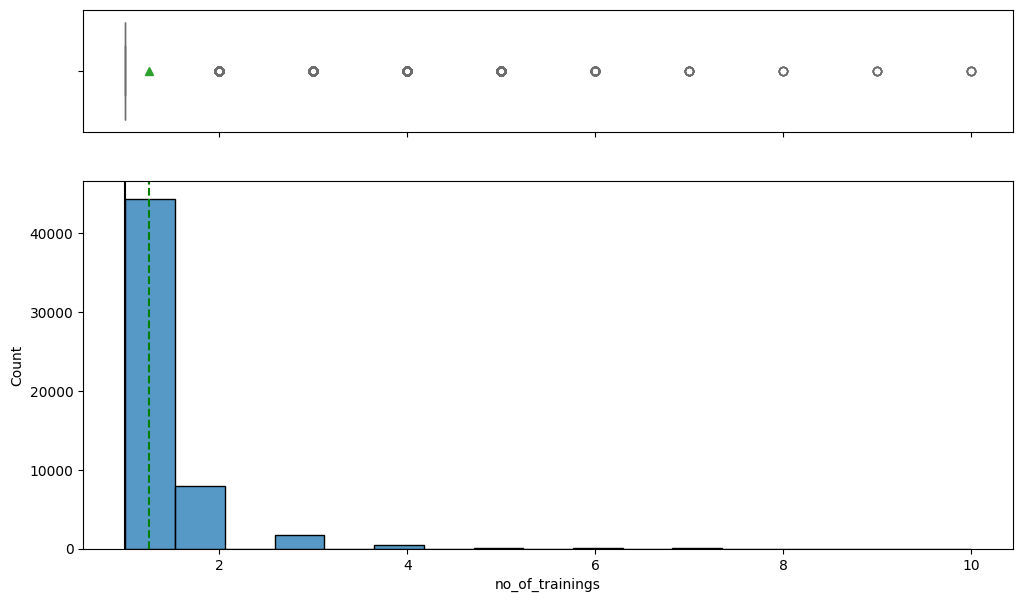

In [29]:
histogram_boxplot(data, "no_of_trainings")

**Let's see the distribution of age of employee**

#### Observations on Age

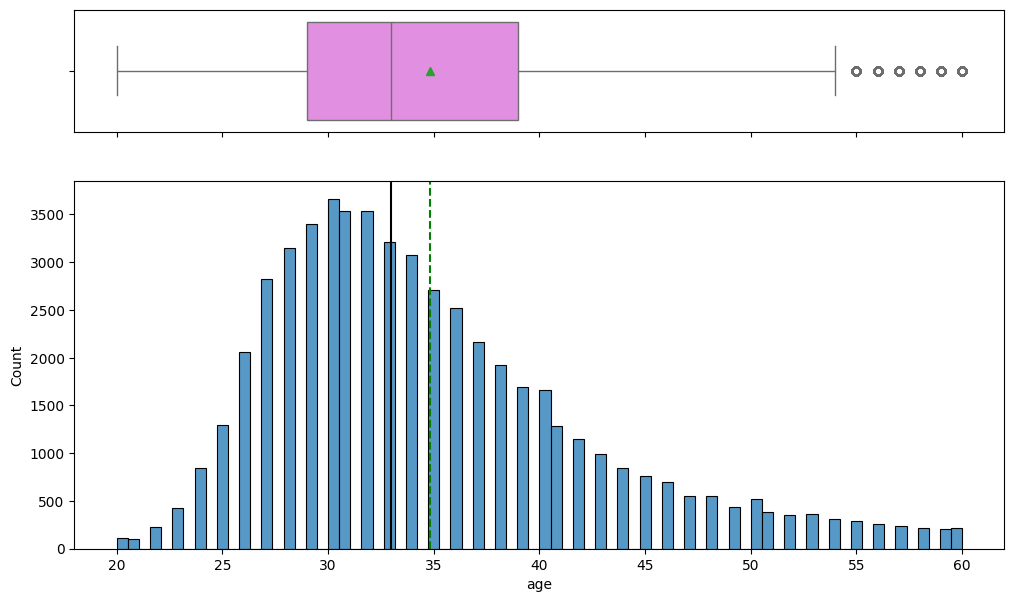

In [30]:
histogram_boxplot(data, "age")  ## Complete the code to create histogram_boxplot for 'age'

#### Observations on Length of Service

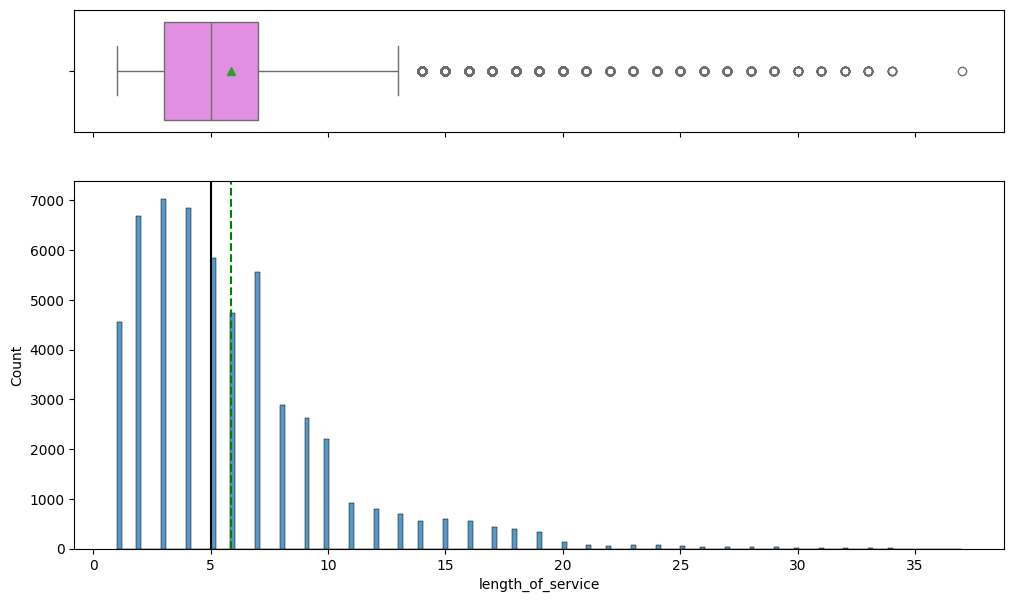

In [34]:
histogram_boxplot(data, "length_of_service")  ## Complete the code to create histogram_boxplot for 'length_of_service'

**Let's see the distribution of average training score of employee**

#### Observations on Average Training Score

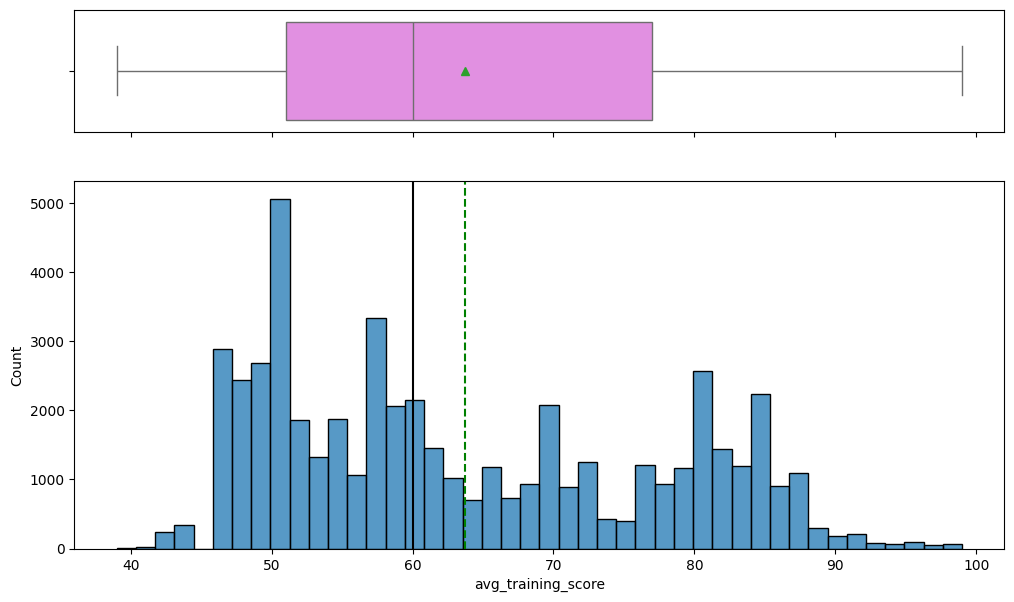

In [33]:
histogram_boxplot(data, "avg_training_score")  ## Complete the code to create histogram_boxplot for 'avg_training_score'

#### Observations on Department

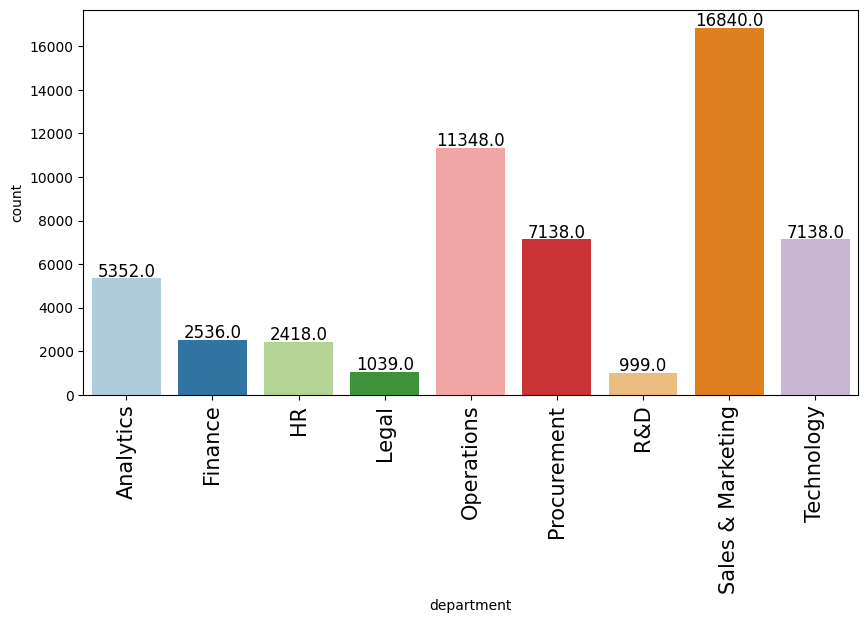

In [32]:
labeled_barplot(data, "department")

#### Observations on Education

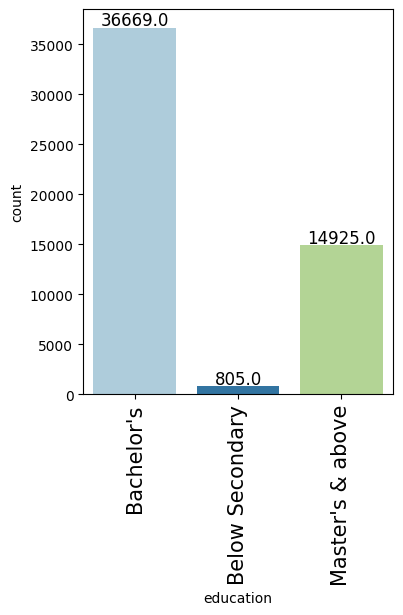

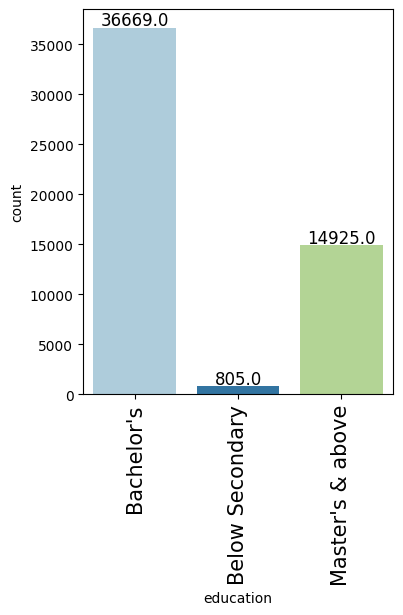

In [35]:
labeled_barplot(data, "education")
labeled_barplot(data, "education") ## Complete the code to create labeled_barplot for 'education'

#### Observations on Gender

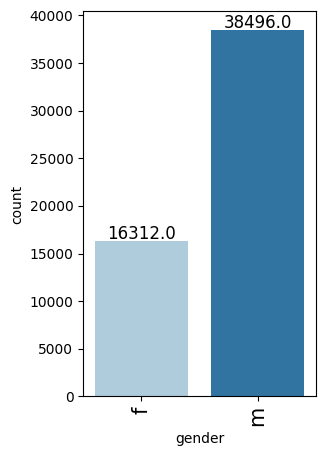

In [36]:
labeled_barplot(data, "gender") ## Complete the code to create labeled_barplot for 'gender'

#### Observations on Recruitment Channel

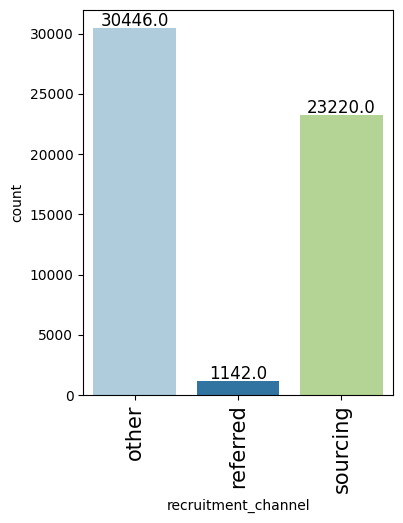

In [37]:
labeled_barplot(data, "recruitment_channel") ## Complete the code to create labeled_barplot for 'recruitment_channel'

#### Observations on Previous Year Rating

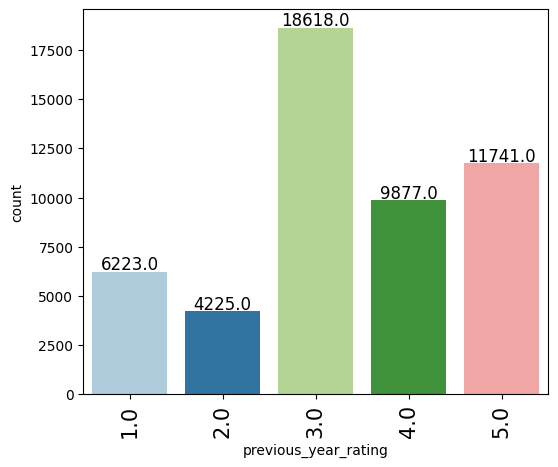

In [38]:
labeled_barplot(data, "previous_year_rating") ## Complete the code to create labeled_barplot for 'previous_year_rating'

#### Observations on Awards Won

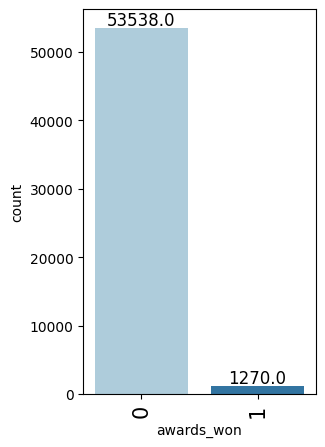

In [39]:
labeled_barplot(data, "awards_won") ## Complete the code to create labeled_barplot for 'awards_won'

#### Observations on Region

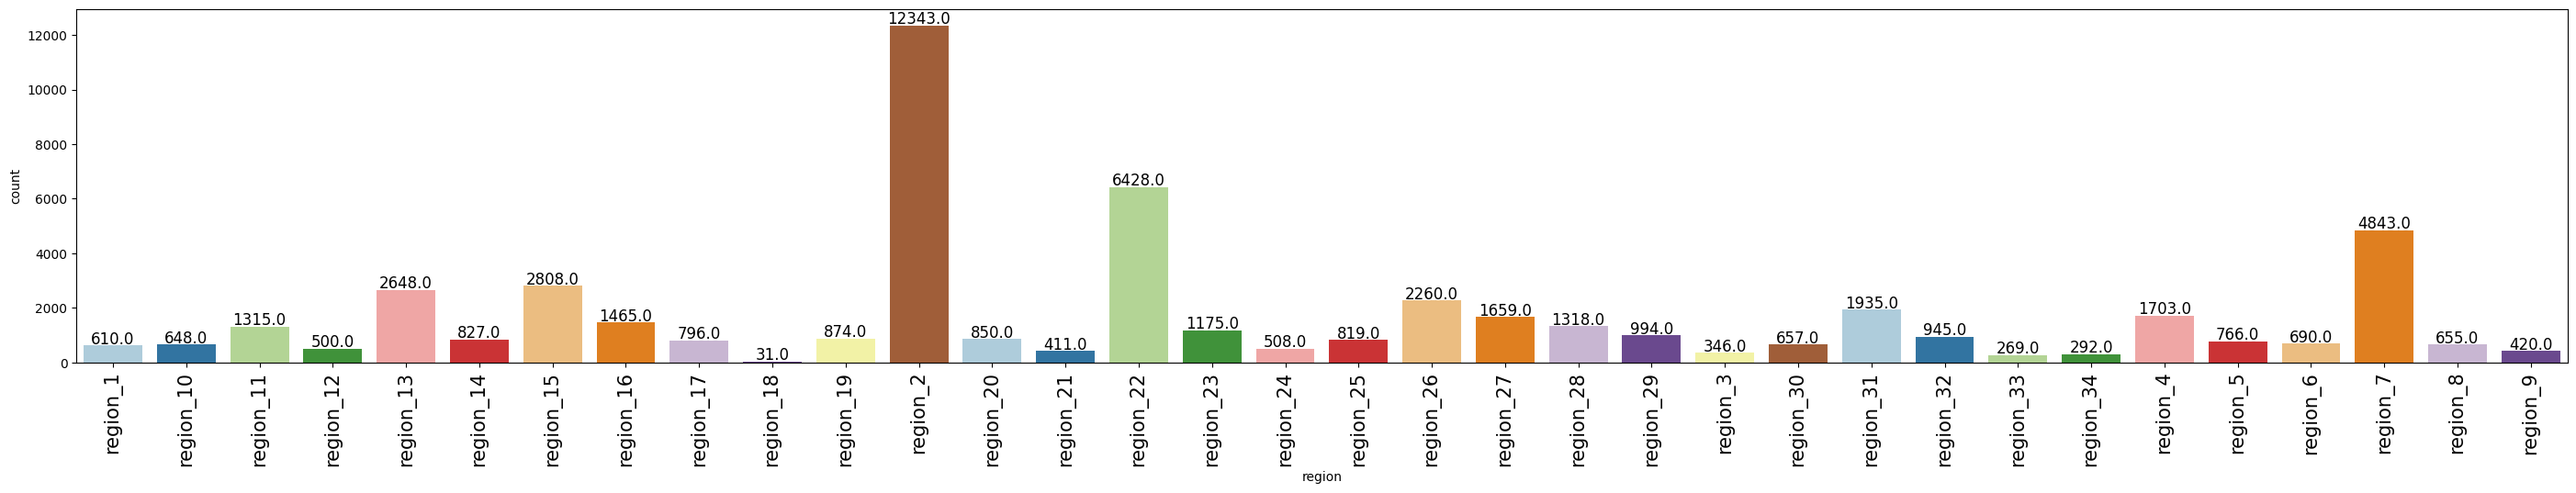

In [40]:
labeled_barplot(data, "region") ## Complete the code to create labeled_barplot for 'region'

#### Observations on target variable

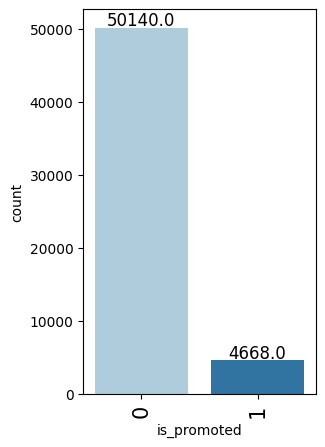

In [41]:
labeled_barplot(data, "is_promoted") ## Complete the code to create labeled_barplot for 'is_promoted'

### Bivariate Analysis

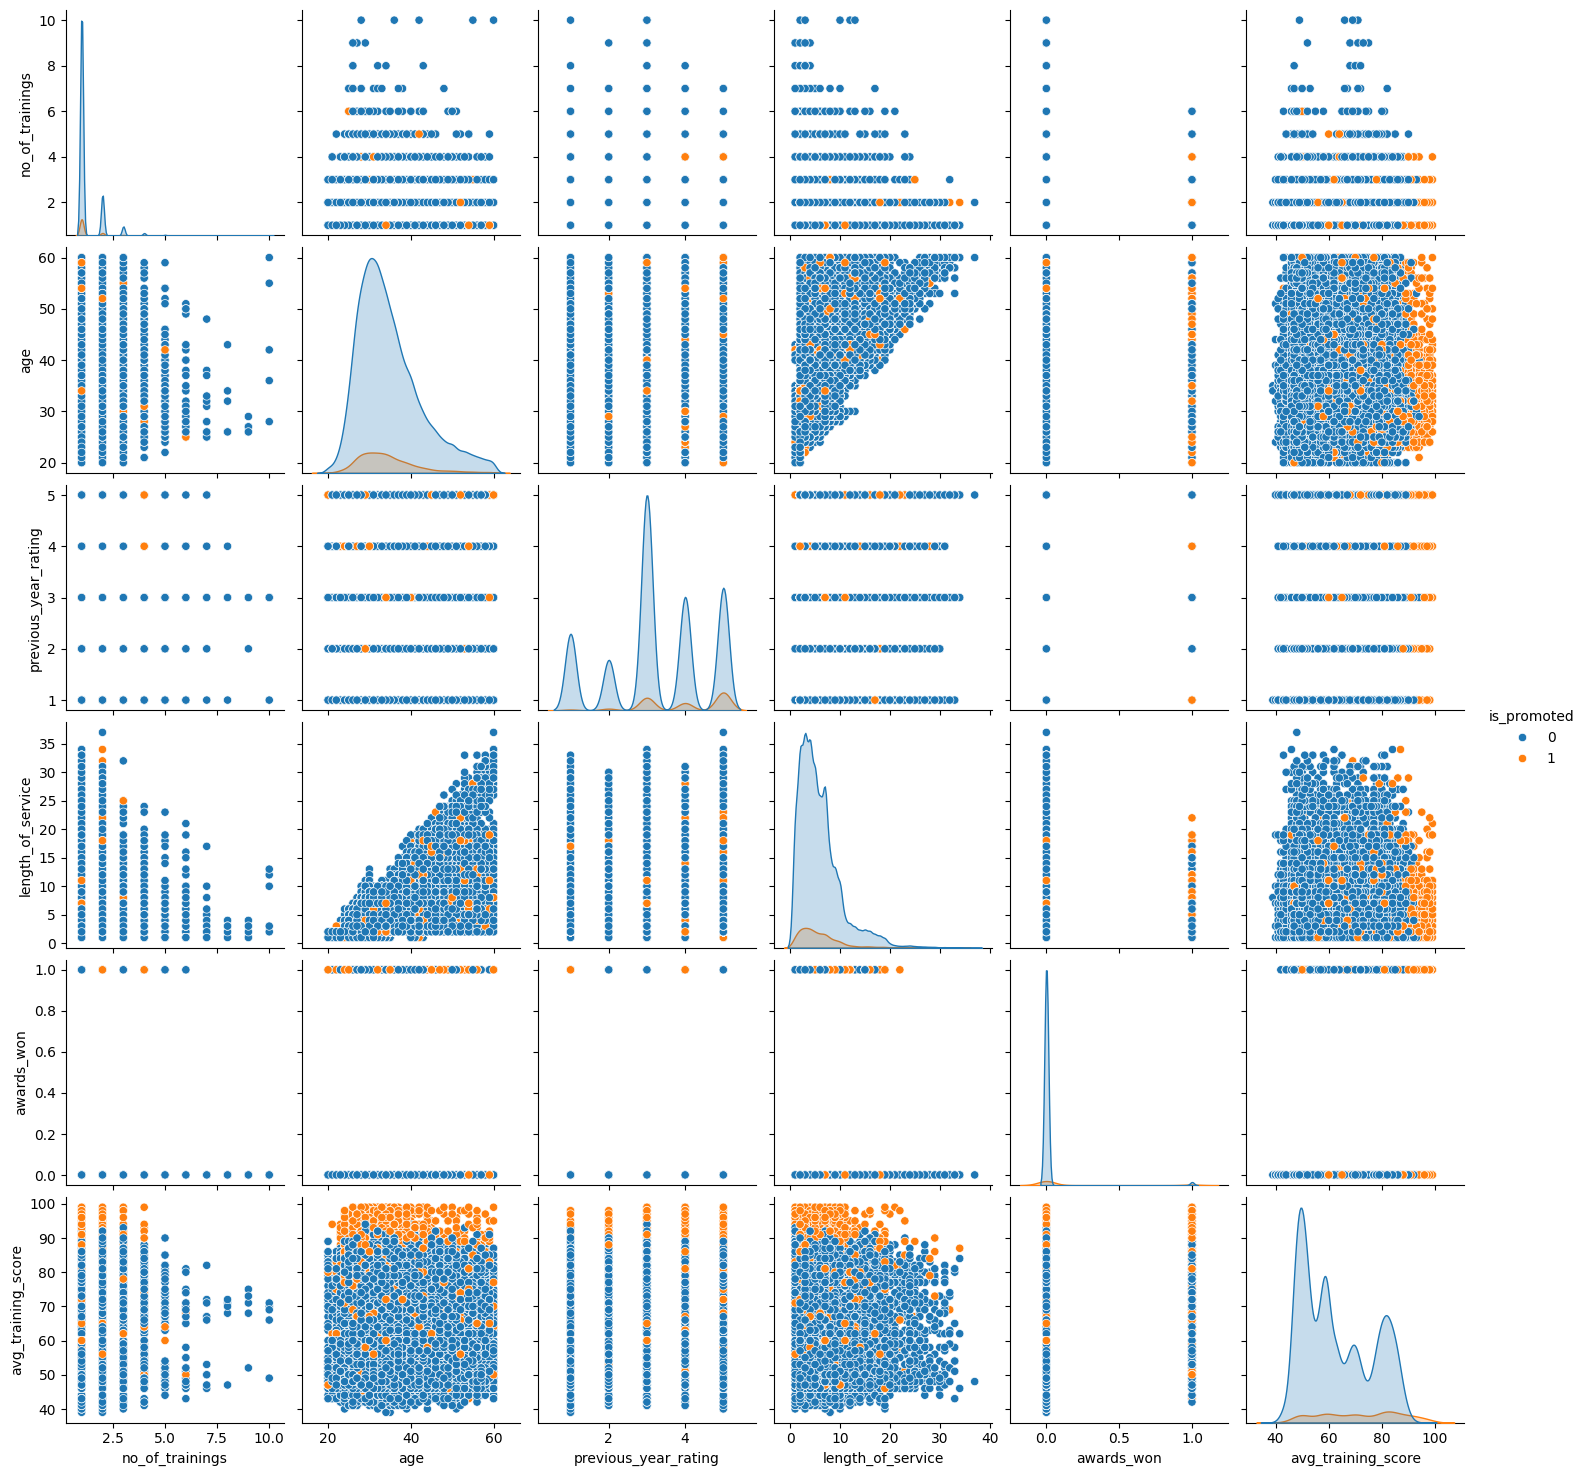

In [42]:
sns.pairplot(data, hue="is_promoted")

#### Target variable vs Age

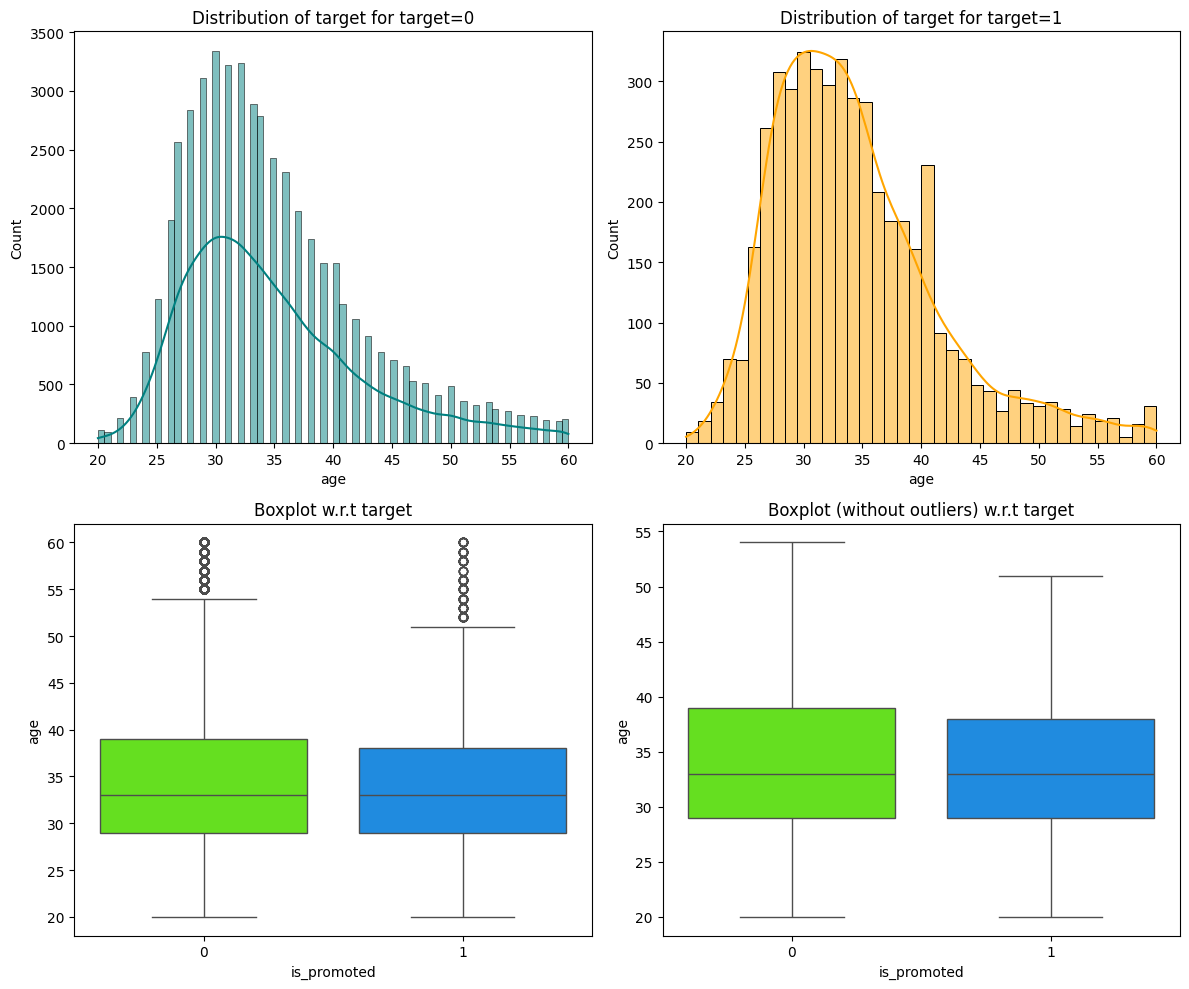

In [43]:
distribution_plot_wrt_target(data, "age", "is_promoted")

**Let's see the change in length of service (length_of_service) vary by the employee's promotion status (is_promoted)?**

#### Target variable vs Length of Service

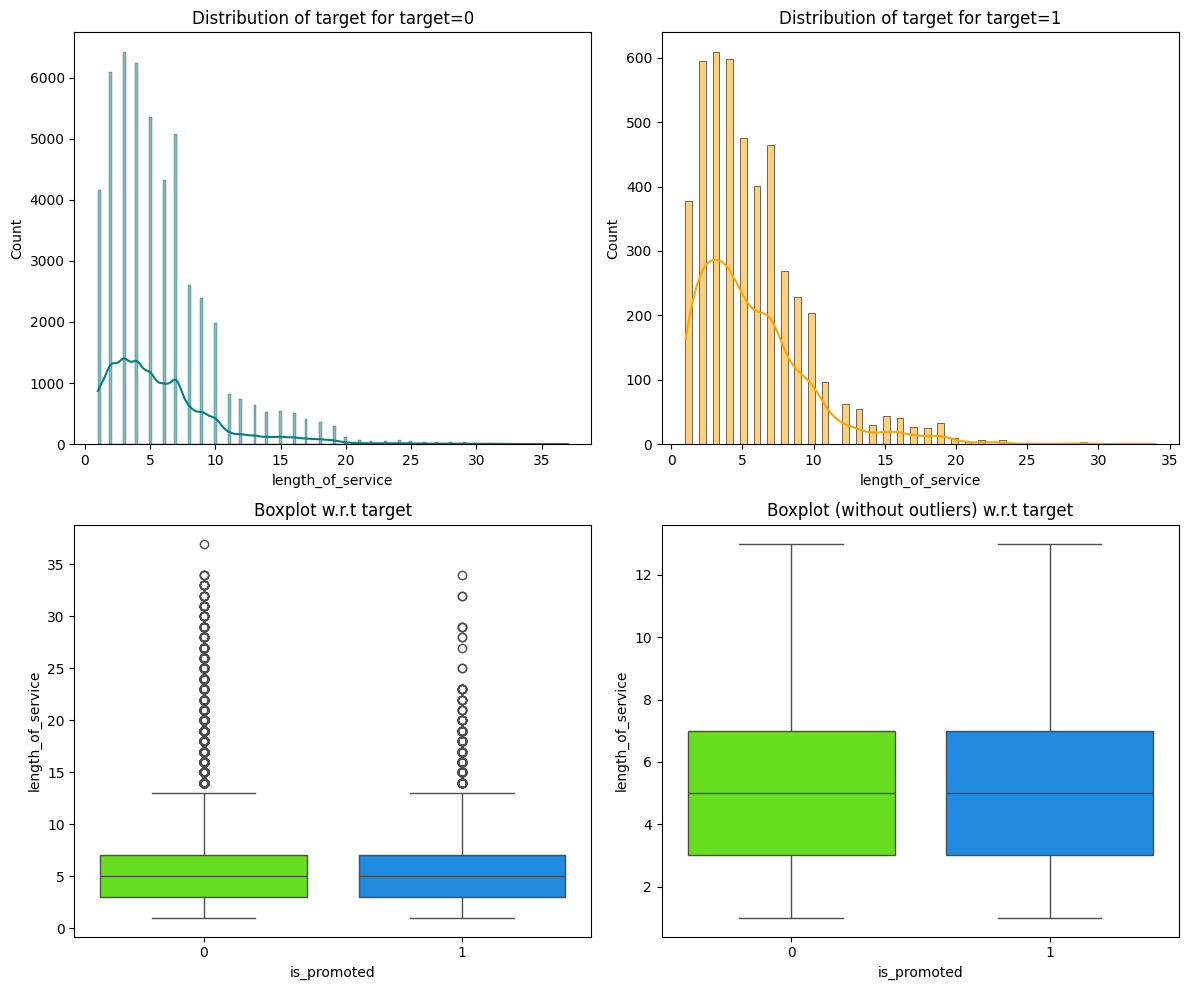

In [44]:
distribution_plot_wrt_target(data, "length_of_service", "is_promoted") ## Complete the code to create distribution_plot for length_of_service vs is_promoted

#### Target variable vs Average Training Score

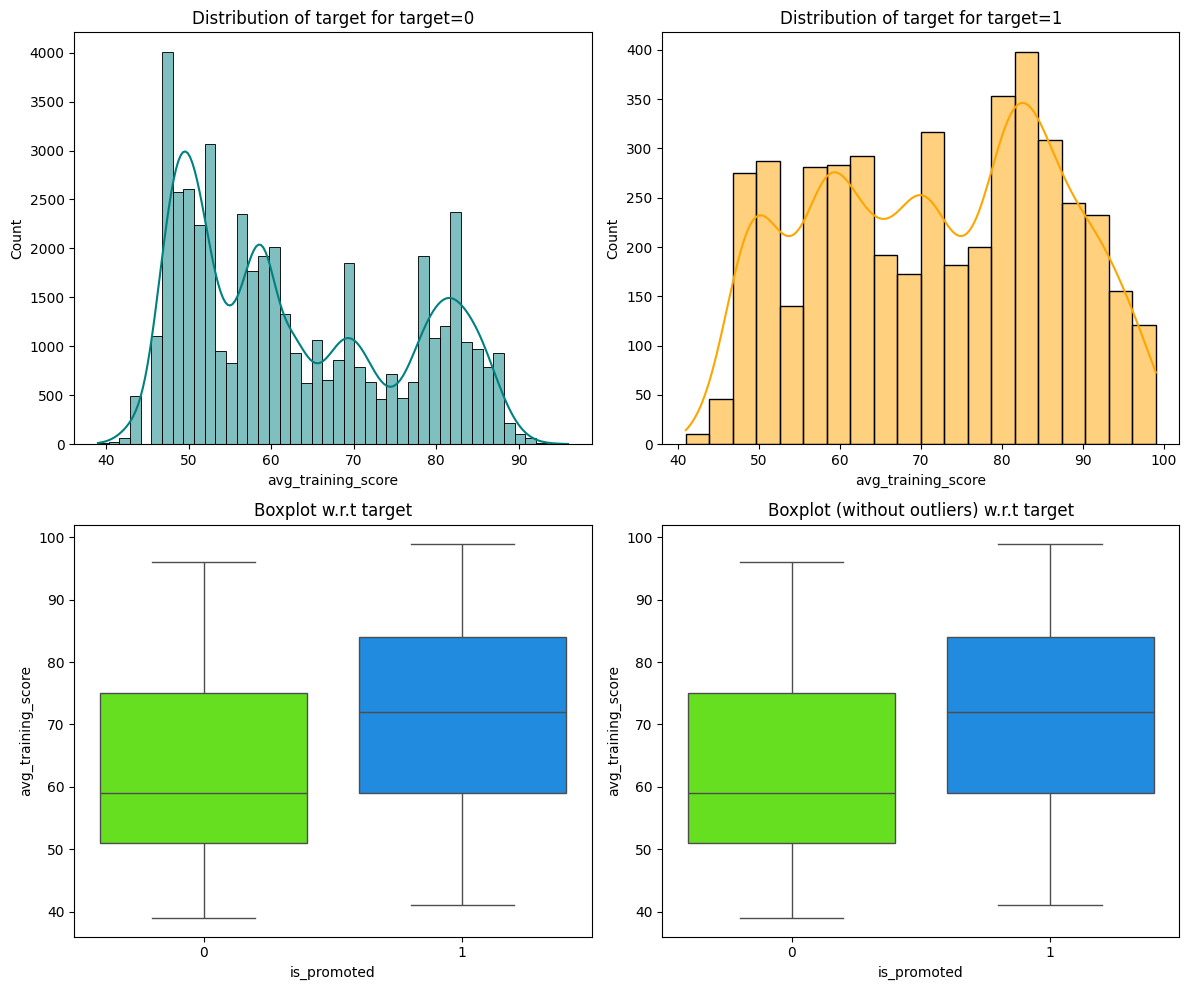

In [45]:
distribution_plot_wrt_target(data, "avg_training_score", "is_promoted") ## Complete the code to create distribution_plot for avg_training_score vs is_promoted

#### Target variable vs Department

is_promoted            0     1    All
department                           
All                50140  4668  54808
Sales & Marketing  15627  1213  16840
Operations         10325  1023  11348
Technology          6370   768   7138
Procurement         6450   688   7138
Analytics           4840   512   5352
Finance             2330   206   2536
HR                  2282   136   2418
R&D                  930    69    999
Legal                986    53   1039
------------------------------------------------------------------------------------------------------------------------


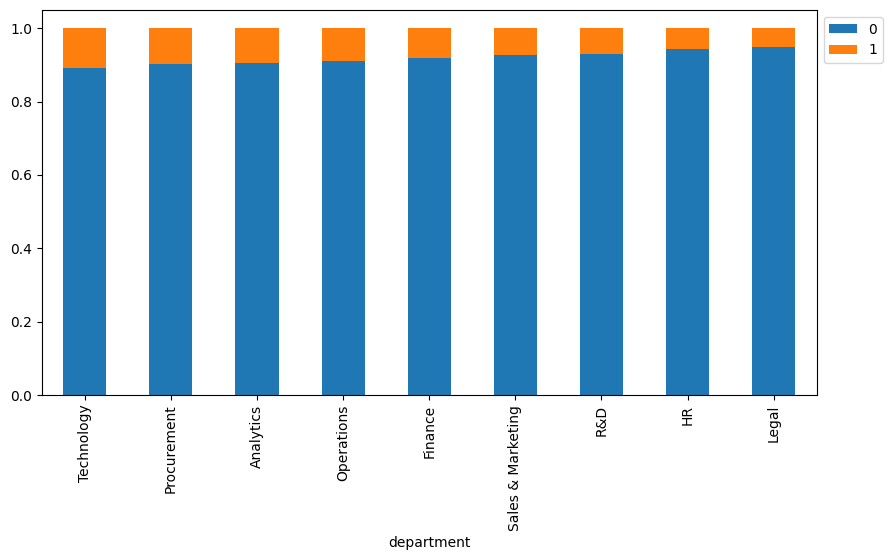

In [46]:
stacked_barplot(data, "department", "is_promoted")

#### Target variable vs Region

is_promoted      0     1    All
region                         
All          50140  4668  54808
region_2     11354   989  12343
region_22     5694   734   6428
region_7      4327   516   4843
region_4      1457   246   1703
region_13     2418   230   2648
region_15     2586   222   2808
region_28     1164   154   1318
region_26     2117   143   2260
region_23     1038   137   1175
region_27     1528   131   1659
region_31     1825   110   1935
region_17      687   109    796
region_25      716   103    819
region_16     1363   102   1465
region_11     1241    74   1315
region_14      765    62    827
region_30      598    59    657
region_1       552    58    610
region_8       602    53    655
region_19      821    53    874
region_10      597    51    648
region_20      801    49    850
region_29      951    43    994
region_32      905    40    945
region_3       309    37    346
region_5       731    35    766
region_12      467    33    500
region_6       658    32    690
region_2

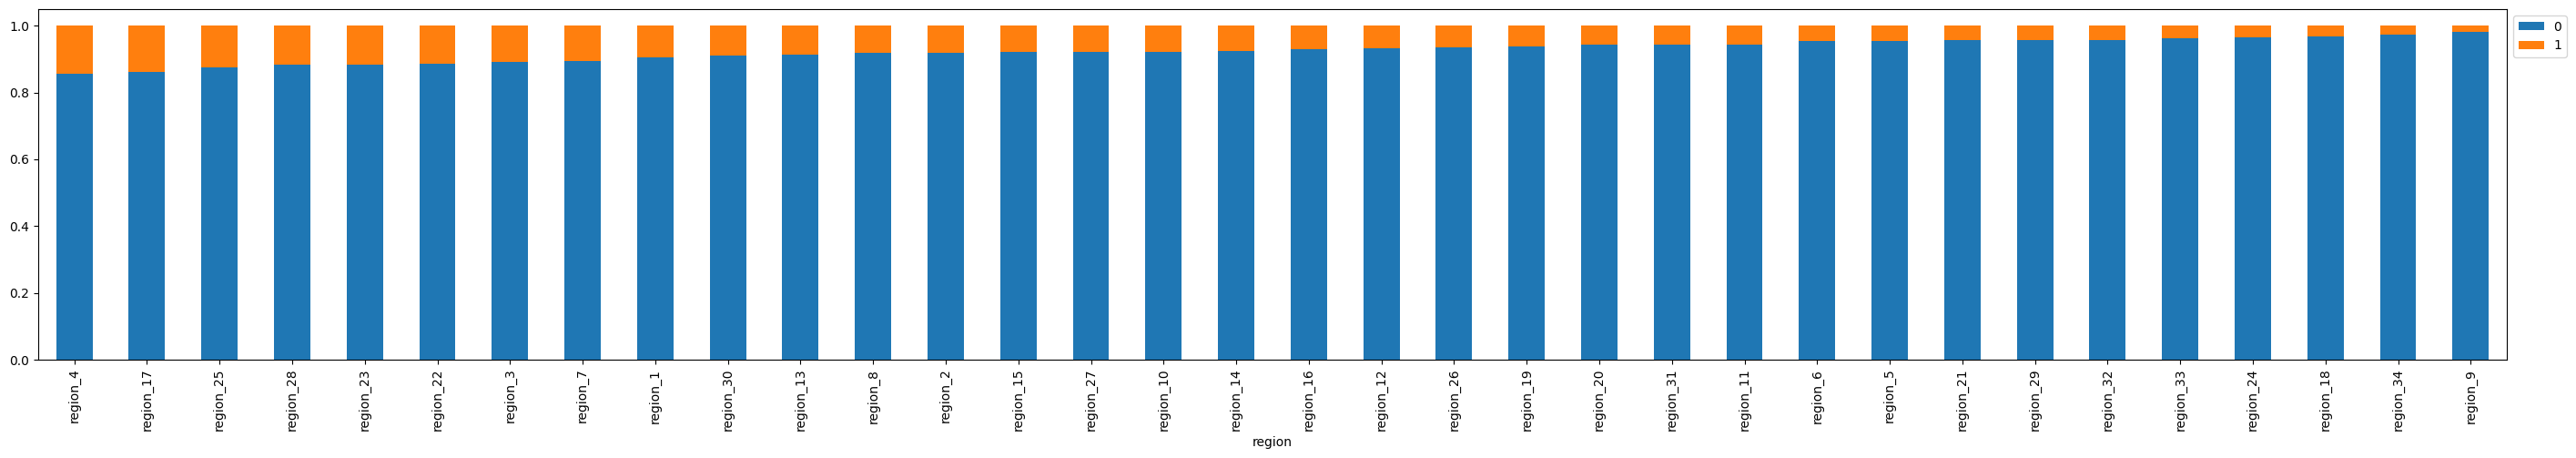

In [47]:
stacked_barplot(data, "region", "is_promoted")

#### Target variable vs Education

is_promoted           0     1    All
education                           
All               47853  4546  52399
Bachelor's        33661  3008  36669
Master's & above  13454  1471  14925
Below Secondary     738    67    805
------------------------------------------------------------------------------------------------------------------------


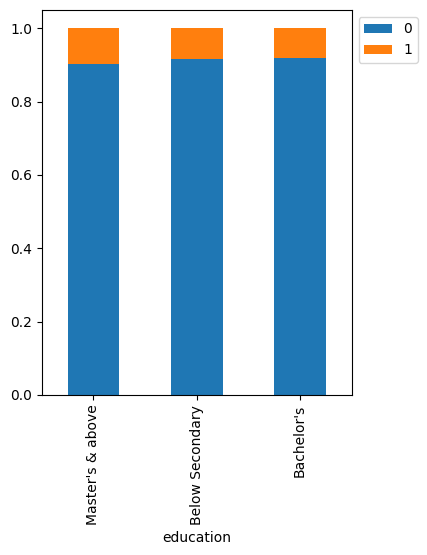

In [48]:
stacked_barplot(data,"education", "is_promoted") ## Complete the code to create distribution_plot for education vs is_promoted

#### Target variable vs Gender

is_promoted      0     1    All
gender                         
All          50140  4668  54808
m            35295  3201  38496
f            14845  1467  16312
------------------------------------------------------------------------------------------------------------------------


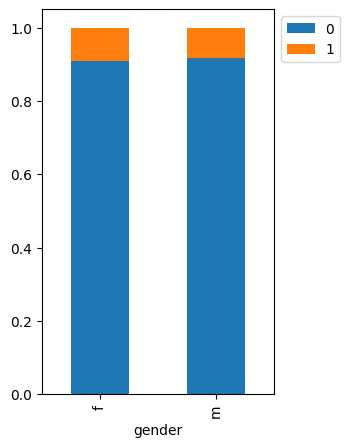

In [49]:
stacked_barplot(data,"gender", "is_promoted") ## Complete the code to create distribution_plot for gender vs is_promoted

#### Target variable vs Recruitment Channel

is_promoted              0     1    All
recruitment_channel                    
All                  50140  4668  54808
other                27890  2556  30446
sourcing             21246  1974  23220
referred              1004   138   1142
------------------------------------------------------------------------------------------------------------------------


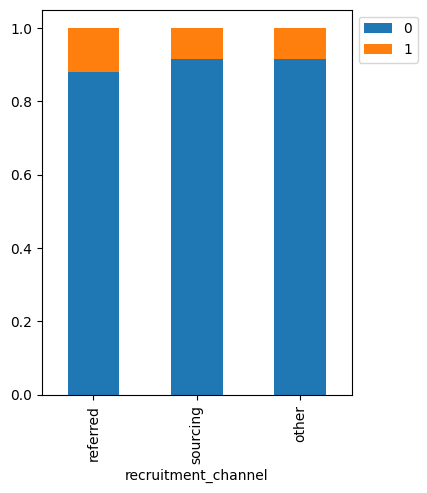

In [50]:
stacked_barplot(data,"recruitment_channel", "is_promoted") ## Complete the code to create distribution_plot for recruitment_channel vs is_promoted

**Let's see the previous rating(previous_year_rating) vary by the employee's promotion status (is_promoted)**

#### Target variable vs Previous Year Rating

is_promoted               0     1    All
previous_year_rating                    
 All                  46355  4329  50684
5.000                  9820  1921  11741
3.000                 17263  1355  18618
4.000                  9093   784   9877
2.000                  4044   181   4225
1.000                  6135    88   6223
------------------------------------------------------------------------------------------------------------------------


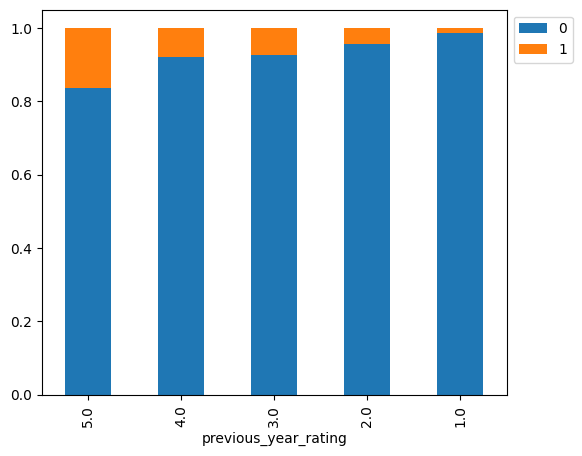

In [51]:
stacked_barplot(data, "previous_year_rating", "is_promoted") ## Complete the code to create distribution_plot for previous_year_rating vs is_promoted

#### Target variable vs Awards Won

is_promoted      0     1    All
awards_won                     
All          50140  4668  54808
0            49429  4109  53538
1              711   559   1270
------------------------------------------------------------------------------------------------------------------------


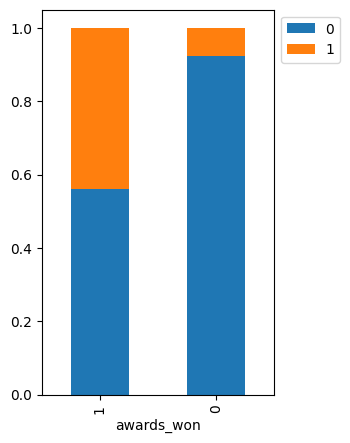

In [52]:
stacked_barplot(data, "awards_won", "is_promoted") ## Complete the code to create distribution_plot for awards_won vs is_promoted

<Axes: xlabel='awards_won', ylabel='avg_training_score'>

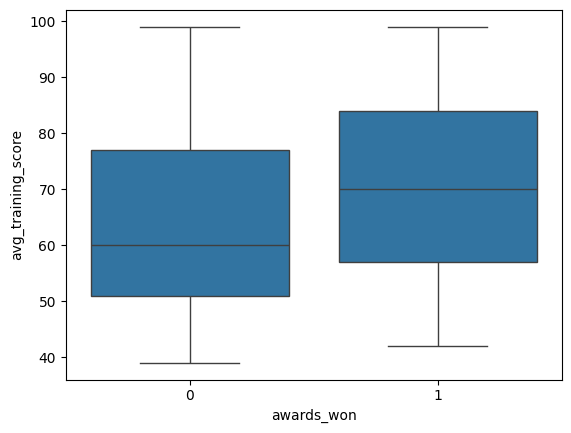

In [53]:
sns.boxplot(data=data, x="awards_won", y="avg_training_score")

**Let's see the attributes that have a strong correlation with each other**

### Correlation Heatmap

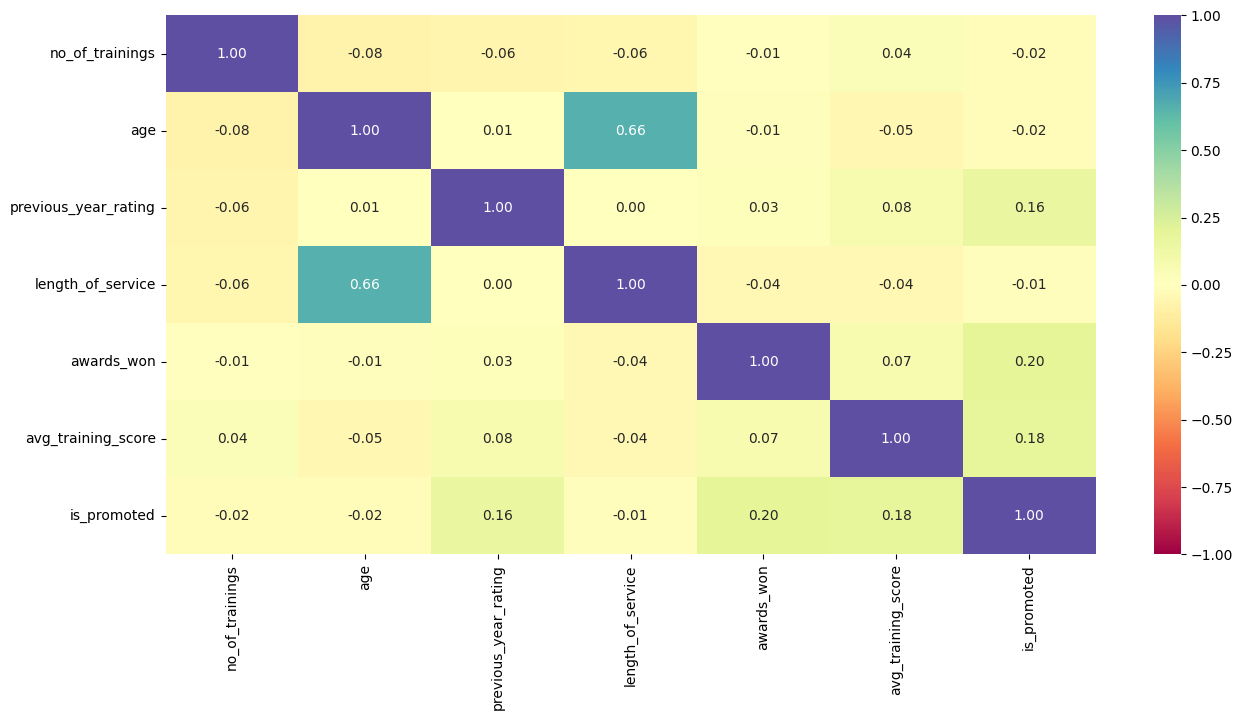

In [56]:
plt.figure(figsize=(15, 7))
sns.heatmap(
    data.corr(numeric_only=True),
    annot=True,
    vmin=-1,
    vmax=1,
    fmt=".2f",
    cmap="Spectral",
)

plt.show()

## Data Preprocessing

In [57]:
data1 = data.copy()

### Train-Test Split

In [58]:
X = data1.drop(["is_promoted"], axis=1)
y = data1["is_promoted"]

In [59]:
# Splitting data into training and validation set:

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y) ## Complete the code to split the data into train test in the ratio 80:20

X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp) ## Complete the code to split the data into train test in the ratio 75:25

print(X_train.shape, X_val.shape, X_test.shape)

(43846, 11) (2741, 11) (8221, 11)


### Missing value imputation

In [60]:
# Defining the imputers for numerical and categorical variables
imputer_mode = SimpleImputer(strategy="most_frequent")
imputer_median = SimpleImputer(strategy="median")

In [62]:
# Fit and transform the train data
X_train[["education"]] = imputer_mode.fit_transform(X_train[["education"]])

# Transform the validation data
X_val[["education"]]  =  imputer_mode.transform(X_val[["education"]]) ## Complete the code to impute missing values in X_val

# Transform the test data
X_test[["education"]] = imputer_mode.transform(X_test[["education"]]) ## Complete the code to impute missing values in X_test


In [63]:
# Fit and transform the train data
X_train[["previous_year_rating", "avg_training_score"]] = imputer_median.fit_transform(
    X_train[["previous_year_rating", "avg_training_score"]]
)

# Transform the validation data
X_val[["previous_year_rating", "avg_training_score"]]  =  imputer_median.transform(X_val[["previous_year_rating", "avg_training_score"]]) ## Complete the code to impute missing values in X_val

# Transform the test data
X_test[["previous_year_rating", "avg_training_score"]] = imputer_median.transform(X_test[["previous_year_rating", "avg_training_score"]]) ## Complete the code to impute missing values in X_test


In [64]:
# Checking that no column has missing values in train, validation and test sets
print(X_train.isna().sum())
print("-" * 30)
print(X_val.isna().sum())
print("-" * 30)
print(X_test.isna().sum())

department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
awards_won              0
avg_training_score      0
dtype: int64
------------------------------
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
awards_won              0
avg_training_score      0
dtype: int64
------------------------------
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
awards_won              0
avg_training_score      0
dtype: int64


### Encoding categorical variables

In [67]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_val = pd.get_dummies(X_val, drop_first=True)  ## Complete the code to impute missing values in X_val
X_test = pd.get_dummies(X_test, drop_first=True)  ## Complete the code to impute missing values in X_val
X_val = X_val.reindex(columns=X_train.columns, fill_value=0)
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)
print(X_train.shape, X_val.shape, X_test.shape)
print(X_train.shape, X_test.shape)

(43846, 52) (2741, 52) (8221, 52)
(43846, 52) (8221, 52)


## Building the model

### Model evaluation criterion

**Model can make wrong predictions as:**

- Predicting an employee should get promoted when he/she should not get promoted
- Predicting an employee should not get promoted when he/she should get promoted

**Which case is more important?**

- Both cases are important here as not promoting a deserving employee might lead to less productivity and the company might lose a good employee which affects the company's growth. Further, giving promotion to a non-deserving employee would lead to loss of monetary resources and giving such employee higher responsibility might again affect the company's growth.

**How to reduce this loss i.e need to reduce False Negatives as well as False Positives?**

- Bank would want `F1-score` to be maximized, as both classes are important here. Hence, the focus should be on increasing the F1-score rather than focusing on just one metric i.e. Recall or Precision.

**First, let's create two functions to calculate different metrics and confusion matrix, so that we don't have to use the same code repeatedly for each model.**

In [78]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred, average="macro")  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

In [79]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Model Building - Original Data

In [80]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random Forest", RandomForestClassifier(random_state=1)))
models.append(("Gradient Boosting", GradientBoostingClassifier(random_state=1)))
models.append(("AdaBoost", AdaBoostClassifier(random_state=1)))
models.append(("Decision Tree", DecisionTreeClassifier(random_state=1)))
 ## Complete the code to append remaining 4 models in the list models

results1 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models

scorer = "f1_macro"

# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Cost:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scorer, cv=kfold
    )
    results1.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Cross-Validation Cost:

Bagging: 0.7038584587045673
Random Forest: 0.6783220856848068
Gradient Boosting: 0.6958158413829658
AdaBoost: 0.5964855874794006
Decision Tree: 0.6480970650747805

Validation Performance:

Bagging: 0.2948717948717949
Random Forest: 0.2606837606837607
Gradient Boosting: 0.2777777777777778
AdaBoost: 0.13247863247863248
Decision Tree: 0.41025641025641024


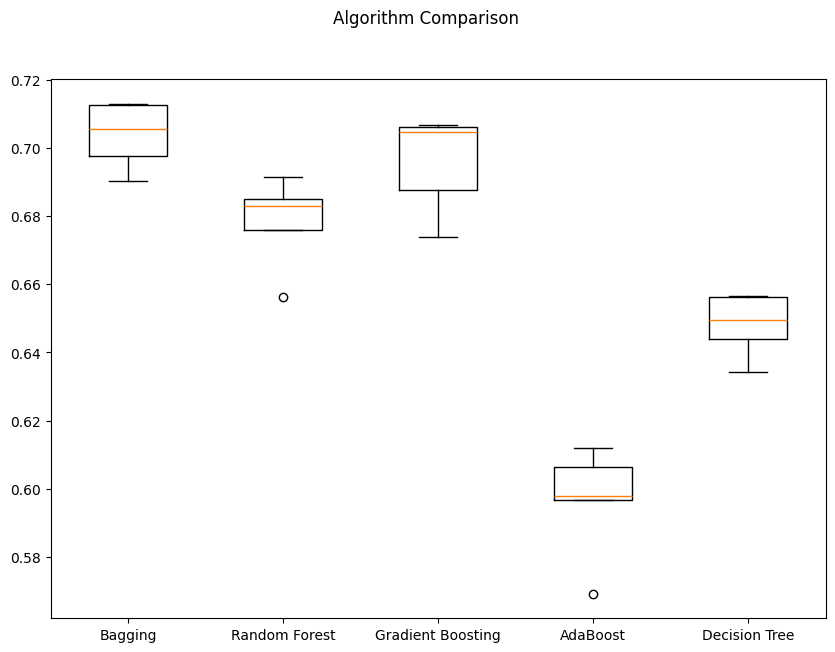

In [81]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results1)
ax.set_xticklabels(names)

plt.show()

### Model Building - Oversampled Data

In [82]:
print("Before Oversampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Oversampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

sm = SMOTE(
    sampling_strategy=1, k_neighbors=5, random_state=1
)  # Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After Oversampling, counts of label 'Yes': {}".format(sum(y_train_over == 1)))
print("After Oversampling, counts of label 'No': {} \n".format(sum(y_train_over == 0)))


print("After Oversampling, the shape of train_X: {}".format(X_train_over.shape))
print("After Oversampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before Oversampling, counts of label 'Yes': 3734
Before Oversampling, counts of label 'No': 40112 

After Oversampling, counts of label 'Yes': 40112
After Oversampling, counts of label 'No': 40112 

After Oversampling, the shape of train_X: (80224, 52)
After Oversampling, the shape of train_y: (80224,) 



In [83]:
results_over = []
names_over = []

print("\nCross-Validation F1-score (Oversampled Data):\n")

for name, model in models:
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
    cv_result = cross_val_score(
        estimator=model,
        X=X_train_over,
        y=y_train_over,
        scoring=scorer,
        cv=kfold,
    )
    results_over.append(cv_result)
    names_over.append(name)
    print(f"{name}: {cv_result.mean():.4f}")
 ## Complete the code to build models on oversampled data
## Note - Take reference from the original models built above


Cross-Validation F1-score (Oversampled Data):

Bagging: 0.9513
Random Forest: 0.9603
Gradient Boosting: 0.8810
AdaBoost: 0.8142
Decision Tree: 0.9297


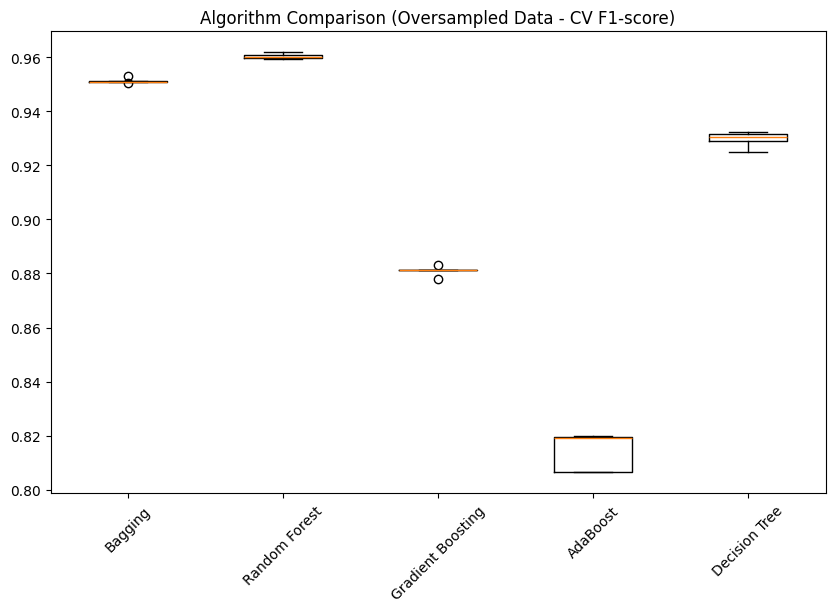

In [84]:
# Plotting boxplots for CV scores of all models defined above
plt.figure(figsize=(10, 6))
plt.boxplot(results_over)
plt.xticks(range(1, len(names_over) + 1), names_over, rotation=45)
plt.title("Algorithm Comparison (Oversampled Data - CV F1-score)")
plt.show()
 ## Write the code to create boxplot to check model performance on oversampled data

### Model Building - Undersampled Data

In [85]:
rus = RandomUnderSampler(random_state=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [86]:
print("Before Under Sampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Under Sampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

print("After Under Sampling, counts of label 'Yes': {}".format(sum(y_train_un == 1)))
print("After Under Sampling, counts of label 'No': {} \n".format(sum(y_train_un == 0)))

print("After Under Sampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Under Sampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before Under Sampling, counts of label 'Yes': 3734
Before Under Sampling, counts of label 'No': 40112 

After Under Sampling, counts of label 'Yes': 3734
After Under Sampling, counts of label 'No': 3734 

After Under Sampling, the shape of train_X: (7468, 52)
After Under Sampling, the shape of train_y: (7468,) 



In [87]:
results_un = []
names_un = []

print("\nCross-Validation F1-score (Undersampled Data):\n")

for name, model in models:
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
    cv_result = cross_val_score(
        estimator=model,
        X=X_train_un,
        y=y_train_un,
        scoring=scorer,
        cv=kfold,
    )
    results_un.append(cv_result)
    names_un.append(name)
    print(f"{name}: {cv_result.mean():.4f}")
 ## Complete the code to build models on undersampled data
## Note - Take reference from the original models built above


Cross-Validation F1-score (Undersampled Data):

Bagging: 0.6909
Random Forest: 0.7071
Gradient Boosting: 0.7216
AdaBoost: 0.6526
Decision Tree: 0.6462


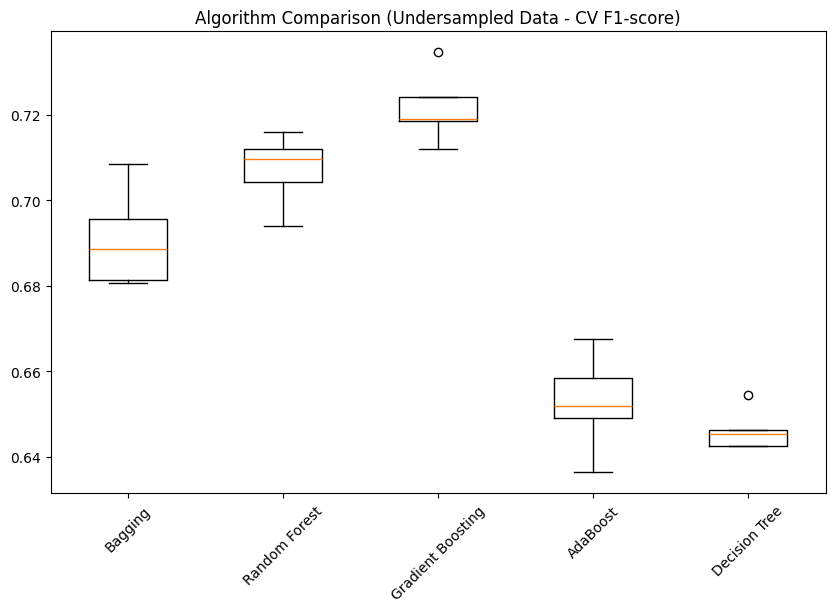

In [88]:
# Plotting boxplots for CV scores of all models defined above
plt.figure(figsize=(10, 6))
plt.boxplot(results_un)
plt.xticks(range(1, len(names_un) + 1), names_un, rotation=45)
plt.title("Algorithm Comparison (Undersampled Data - CV F1-score)")
plt.show()
 ## Write the code to create boxplot to check model performance on undersampled data

### Hyperparameter Tuning

#### **Note**
1. Sample parameter grid has been provided to do necessary hyperparameter tuning. One can extend/reduce the parameter grid based on execution time and system configuration to try to improve the model performance further wherever needed.      
2. The models chosen in this notebook are based on test runs. One can update the best models as obtained upon code execution and tune them for best performance.



#### Tuning AdaBoost using Undersampled data

In [90]:
%%time

# defining model
Model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": np.arange(10, 110, 10),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = 'f1_macro'

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un, y_train_un) ## Complete the code to fit the model on undersampled data

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': np.int64(70), 'learning_rate': 1, 'estimator': DecisionTreeClassifier(max_depth=3, random_state=1)} with CV score=0.7092365867486399:
CPU times: user 2.15 s, sys: 170 ms, total: 2.32 s
Wall time: 1min 47s


In [91]:
# Creating new pipeline with best parameters
tuned_adb1 = AdaBoostClassifier( random_state=1, n_estimators=70, learning_rate=1, estimator=DecisionTreeClassifier(max_depth=3, random_state=1)) ## Complete the code with the best parameters obtained from tuning

tuned_adb1.fit(X_train_un, y_train_un) ## Complete the code to fit the model on undersampled data

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3,
                                                    random_state=1),
                   learning_rate=1, n_estimators=70, random_state=1)

In [92]:
adb1_train = model_performance_classification_sklearn(tuned_adb1, X_train_un, y_train_un) ## Complete the code to check the performance on training set
adb1_train

,Accuracy,Recall,Precision,F1
0,0.723,0.675,0.747,0.723


In [93]:
# Checking model's performance on validation set
adb1_val =  model_performance_classification_sklearn(tuned_adb1, X_val, y_val) ## Complete the code to check the performance on validation set
adb1_val

,Accuracy,Recall,Precision,F1
0,0.764,0.645,0.211,0.588


#### Tuning AdaBoost using original data

In [96]:
%%time

# defining model
Model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": np.arange(10, 110, 10),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = 'f1_macro'

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train, y_train) ## Complete the code to fit the model on original data

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': np.int64(70), 'learning_rate': 1, 'estimator': DecisionTreeClassifier(max_depth=3, random_state=1)} with CV score=0.6469262291040385:
CPU times: user 6.47 s, sys: 519 ms, total: 6.99 s
Wall time: 8min 31s


In [98]:
# Creating new pipeline with best parameters
tuned_adb2 = AdaBoostClassifier( random_state=1,n_estimators=70,learning_rate=1,estimator=DecisionTreeClassifier(max_depth=3, random_state=1),) ## Complete the code with the best parameters obtained from tuning

tuned_adb2.fit(X_train, y_train) ## Complete the code to fit the model on original data

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3,
                                                    random_state=1),
                   learning_rate=1, n_estimators=70, random_state=1)

In [99]:
adb2_train = model_performance_classification_sklearn(tuned_adb2, X_train, y_train) ## Complete the code to check the performance on training set
adb2_train

,Accuracy,Recall,Precision,F1
0,0.928,0.215,0.767,0.648


In [100]:
# Checking model's performance on validation set
adb2_val =  model_performance_classification_sklearn(tuned_adb2, X_val, y_val) ## Complete the code to check the performance on validation set
adb2_val

,Accuracy,Recall,Precision,F1
0,0.925,0.201,0.723,0.637


#### Tuning Gradient Boosting using undersampled data

In [101]:
%%time

#Creating pipeline
Model = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(75,150,25),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "subsample":[0.5,0.7,1],
    "max_features":[0.5,0.7,1],
}

# Type of scoring used to compare parameter combinations
scorer = 'f1_macro'

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un, y_train_un) ## Complete the code to fit the model on under sampled data

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.7, 'n_estimators': np.int64(100), 'max_features': 0.5, 'learning_rate': 0.1, 'init': AdaBoostClassifier(random_state=1)} with CV score=0.7207387245467136:
CPU times: user 2.33 s, sys: 203 ms, total: 2.54 s
Wall time: 2min 24s


In [102]:
# Creating new pipeline with best parameters
tuned_gbm1 = GradientBoostingClassifier(
    max_features=0.5,
    init=AdaBoostClassifier(random_state=1),
    random_state=1,
    learning_rate=0.1,
    n_estimators=100,
    subsample=0.7,
)## Complete the code with the best parameters obtained from tuning

tuned_gbm1.fit(X_train_un, y_train_un)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.5, random_state=1, subsample=0.7)

In [103]:
gbm1_train = model_performance_classification_sklearn(tuned_gbm1, X_train_un, y_train_un) ## Complete the code to check the performance on oversampled train set
gbm1_train

,Accuracy,Recall,Precision,F1
0,0.741,0.670,0.781,0.740


In [104]:
gbm1_val = model_performance_classification_sklearn(tuned_gbm1, X_val, y_val) ## Complete the code to check the performance on validation set
gbm1_val

,Accuracy,Recall,Precision,F1
0,0.782,0.628,0.223,0.600


#### Tuning Gradient Boosting using original data

In [105]:
%%time

#defining model
Model = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(75,150,25),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "subsample":[0.5,0.7,1],
    "max_features":[0.5,0.7,1],
}

# Type of scoring used to compare parameter combinations
scorer = 'f1_macro'

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train, y_train) ## Complete the code to fit the model on original data

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.7, 'n_estimators': np.int64(125), 'max_features': 0.7, 'learning_rate': 0.2, 'init': AdaBoostClassifier(random_state=1)} with CV score=0.7194607575241472:
CPU times: user 8.86 s, sys: 531 ms, total: 9.39 s
Wall time: 10min 6s


In [106]:
# Creating new pipeline with best parameters
tuned_gbm2 = GradientBoostingClassifier(
    max_features=0.7,
    init=AdaBoostClassifier(random_state=1),
    random_state=1,
    learning_rate=0.2,
    n_estimators=125,
    subsample=0.7,
)## Complete the code with the best parameters obtained from tuning

tuned_gbm2.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           learning_rate=0.2, max_features=0.7,
                           n_estimators=125, random_state=1, subsample=0.7)

In [108]:
gbm2_train = model_performance_classification_sklearn(tuned_gbm2, X_train, y_train) ## Complete the code to check the performance on original data
gbm2_train

,Accuracy,Recall,Precision,F1
0,0.941,0.328,0.956,0.729


In [109]:
gbm2_val =  model_performance_classification_sklearn(tuned_gbm2, X_val, y_val) ## Complete the code to check the performance on validation set
gbm2_val

,Accuracy,Recall,Precision,F1
0,0.938,0.308,0.911,0.714


## Model Comparison and Final Model Selection

In [110]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        gbm1_train.T,
        gbm2_train.T,
        adb1_train.T,
        adb2_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Gradient boosting trained with Undersampled data",
    "Gradient boosting trained with Original data",
    "AdaBoost trained with Undersampled data",
    "AdaBoost trained with Original data",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Gradient boosting trained with Undersampled data,Gradient boosting trained with Original data,AdaBoost trained with Undersampled data,AdaBoost trained with Original data
Accuracy,0.741,0.941,0.723,0.928
Recall,0.670,0.328,0.675,0.215
Precision,0.781,0.956,0.747,0.767
F1,0.740,0.729,0.723,0.648


In [115]:
# validation performance comparison

models_val_comp_df = pd.concat([
        gbm1_val.T,
        gbm2_val.T,
        adb1_val.T,
        adb2_val.T,
    ],
    axis=1,
)

models_val_comp_df.columns = [
    "Gradient boosting trained with Undersampled data",
    "Gradient boosting trained with Original data",
    "AdaBoost trained with Undersampled data",
    "AdaBoost trained with Original data",
]

print("Validation performance comparison:")
models_val_comp_df
 ## Write the code to compare the performance on validation set

Validation performance comparison:


,Gradient boosting trained with Undersampled data,Gradient boosting trained with Original data,AdaBoost trained with Undersampled data,AdaBoost trained with Original data
Accuracy,0.782,0.938,0.764,0.925
Recall,0.628,0.308,0.645,0.201
Precision,0.223,0.911,0.211,0.723
F1,0.600,0.714,0.588,0.637


**Now we have our final model, so let's find out how our final model is performing on unseen test data.**

In [111]:
# Let's check the performance on test set
gbm2_test = model_performance_classification_sklearn(
    tuned_gbm2, X_test, y_test
)
gbm2_test
 ## Write the code to check the performance of best model on test data

,Accuracy,Recall,Precision,F1
0,0.941,0.326,0.931,0.725


### Feature Importances

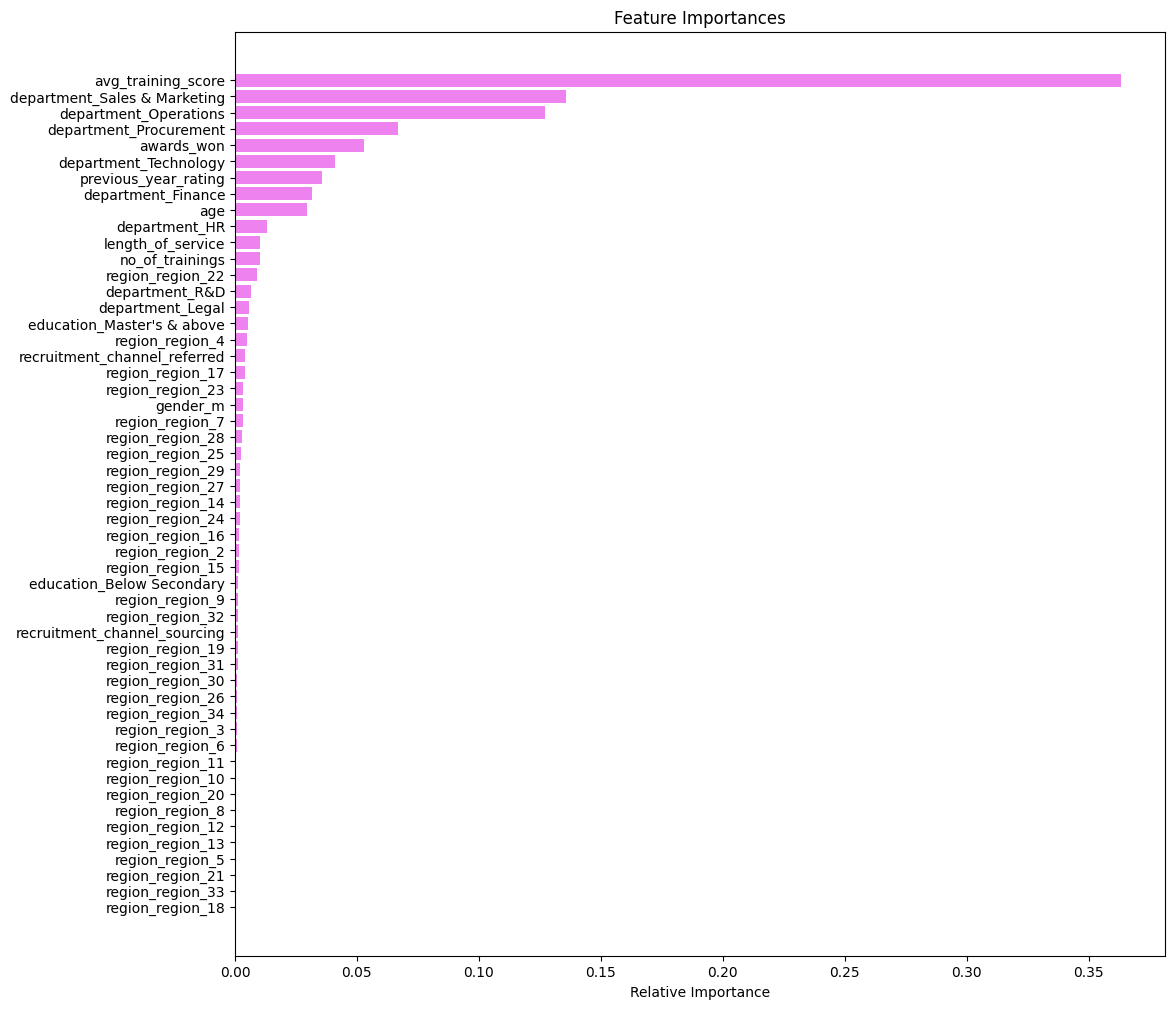

In [112]:
feature_names = X_train.columns
importances =  tuned_gbm2.feature_importances_ ## Complete the code to check the feature importance of the best model
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

# Business Insights and Conclusions


- Gradient Boosting trained on original data was selected as the final model based on the highest validation F1-score.
- The model shows strong generalization with consistent F1-scores across validation and test datasets.
- Average training score, previous year rating, length of service, and awards won emerged as the most important factors influencing promotion decisions.
- Employees with higher training performance and strong historical ratings have a significantly higher probability of promotion.
- The model prioritizes precision, ensuring that employees recommended for promotion are highly likely to be deserving candidates.
- This solution can help the HR team reduce manual effort, speed up appraisal cycles, and ensure fair, data-driven promotion decisions.



***